<a href="https://colab.research.google.com/github/DAEHO0/python/blob/main/230905_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ML 복습

# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

In [4]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Ashopping.csv', encoding = 'CP949')
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [5]:
# 변수명 추출
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [6]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [7]:
# 변수 할당
num = ['총매출액', '할인권 사용 횟수', '총 할인 금액', '평균 구매주기']
cg = ['구매금액대', '고객등급', '거주지역'] # 범주형

In [8]:
X = df[num + cg]
X

,총매출액,할인권 사용 횟수,총 할인 금액,평균 구매주기,구매금액대,고객등급,거주지역
0,4963160,1,5445,149.136364,1,1,6
1,2271520,22,350995,81.342105,0,1,4
2,2484250,6,186045,1817.000000,0,1,6
3,2778850,1,5195,403.111111,0,2,5
4,4437610,9,246350,362.800000,1,2,6
...,...,...,...,...,...,...,...
995,12731560,3,44445,131.257143,2,2,6
996,3419010,6,186545,770.666667,0,1,6
997,4612100,8,260700,355.230769,1,2,4
998,5165360,20,347700,138.535714,1,1,5


In [9]:
Y = df['1회 평균매출액']
Y

0       225598
1        59777
2      1242125
3       308761
4       443761
        ...   
995     363759
996     569835
997     354777
998     184477
999     270191
Name: 1회 평균매출액, Length: 1000, dtype: int64

In [10]:
# 라이브러리 불러오기
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

<ipython-input-13-361591cc5498>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='1회 평균매출액', ylabel='Density'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


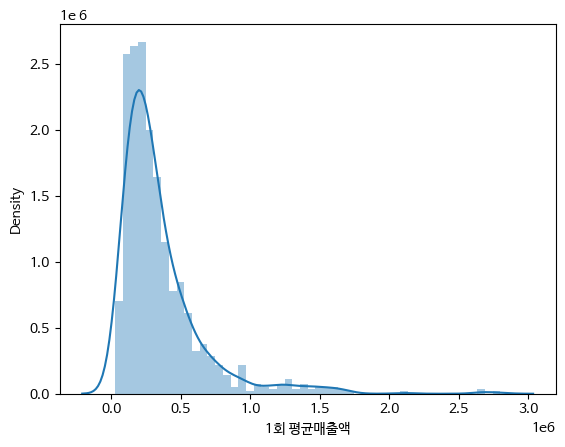

In [13]:
plt.rc('font', family = "NanumBarunGothic")
sns.distplot(Y)

# 종 모양이 기울어져 있으면
# 종속변수를 예측할 때 왜곡이 생길 수 있음
# 대표성이 떨어짐

<ipython-input-14-28d8edf82bb2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='1회 평균매출액', ylabel='Density'>

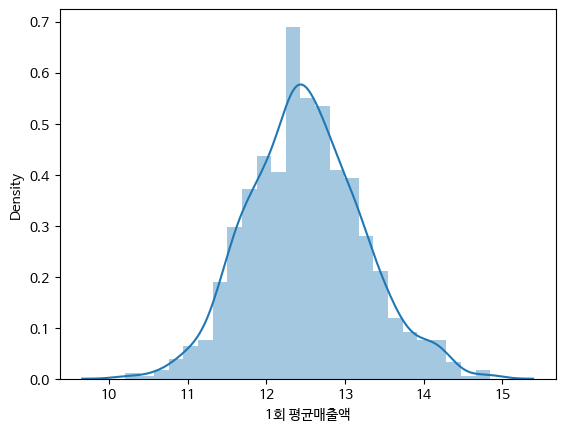

In [14]:
Y = np.log1p(Y)
# np.log1p 자연로그(완전한 자연로그는 아님)
# 로그를 씌우면 정규분포로 바뀜

sns.distplot(Y)

In [15]:
# 모듈 불러오기
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
# 표준화(scaling), 원핫인코딩 : 컬럼트랜스포머
# 원핫인코딩 : 범주형 데이터를 수치형 데이터로 변환

ct = ColumnTransformer([('scaling', StandardScaler(), num), ('onehot', OneHotEncoder(), cg)])
ct
# ColumnsTransformer([(), ()])

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '할인권 사용 횟수', '총 할인 금액', '평균 구매주기']),
                                ('onehot', OneHotEncoder(),
                                 ['구매금액대', '고객등급', '거주지역'])])

In [17]:
ct.fit(X)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '할인권 사용 횟수', '총 할인 금액', '평균 구매주기']),
                                ('onehot', OneHotEncoder(),
                                 ['구매금액대', '고객등급', '거주지역'])])

In [18]:
X = ct.transform(X)
# array로 반환

In [20]:
X = pd.DataFrame(X)
# array -> dataframe

X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.154022,-1.802412,-2.564558,-0.463652,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.617306,0.716431,0.523977,-0.730610,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.580691,-1.202687,-0.950351,6.104025,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.529985,-1.802412,-2.566793,0.536445,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.244479,-0.842853,-0.411343,0.377708,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.183073,-1.562522,-2.215975,-0.534056,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,-0.419801,-1.202687,-0.945882,1.983797,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
997,-0.214446,-0.962798,-0.283082,0.347902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,-0.119219,0.476541,0.494526,-0.505395,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
# num = ['총매출액', '할인권 사용 횟수', '총 할인 금액', '평균 구매주기', '구매금액대0', '구매금액대1', '구매금액대2','고객등급', '거주지역']
# 구매금액대 관측값 : 0, 1, 2, 1, 2, 0 ...
# 구매금액대0 : 1, 0, 0, 0, 0, 1 ...
# 구매금액대1 : 0, 1, 0, 1, 0, 0 ...
# 구매금액대2 : 0, 0, 1, 0, 1, 0 ...

In [25]:
X.columns = ['총매출액', '할인권 사용 횟수', '총 할인 금액', '평균 구매주기', '구매금액대0', '구매금액대1', '구매금액대2', '고객등급', '거주지역',
             '거주지역1', '거주지역2', '거주지역3', '거주지역4' ,'거주지역5' ,'거주지역6', '거주지역7']

In [27]:
data = pd.concat([X, Y], axis = 1)
data

,총매출액,할인권 사용 횟수,총 할인 금액,평균 구매주기,구매금액대0,구매금액대1,구매금액대2,고객등급,거주지역,거주지역1,거주지역2,거주지역3,거주지역4,거주지역5,거주지역6,거주지역7,1회 평균매출액
0,-0.154022,-1.802412,-2.564558,-0.463652,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.326514
1,-0.617306,0.716431,0.523977,-0.730610,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.998393
2,-0.580691,-1.202687,-0.950351,6.104025,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.032335
3,-0.529985,-1.802412,-2.566793,0.536445,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.640326
4,-0.244479,-0.842853,-0.411343,0.377708,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.003044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.183073,-1.562522,-2.215975,-0.534056,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.804250
996,-0.419801,-1.202687,-0.945882,1.983797,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.253104
997,-0.214446,-0.962798,-0.283082,0.347902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.779248
998,-0.119219,0.476541,0.494526,-0.505395,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.125285


In [28]:
from statsmodels.formula.api import ols

In [29]:
reg = ols(formula = 'Y ~ X', data = data).fit()
# ols(최소 제곱 회귀, oldinary least squares regression)
# 종속 변수와 하나 이상의 독립 변수 간의 관계를 모델링하는 데 사용됨

In [30]:
reg

In [31]:
reg.summary()
# 할인권 사용 횟수와 총 할인 금액의 상관성(다중공선성)으로
# 총 할인 금액 변수 삭제

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     128.5
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          1.16e-201
Time:                        01:21:48   Log-Likelihood:                -597.95
No. Observations:                1000   AIC:                             1224.
Df Residuals:                     986   BIC:                             1293.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3815      0.020    325.765      0.000       6.343       6.420
X[0]           0.1789      0.020      8.829      0.000       0.139       0.219
X[1]          -0.0066      0.027     -0.246      0.805      -0.059       0.046
X[2]           0.0247      0.027      0.924      0.356      -0.028       0.077
X[3]           0.5341      0.015     36.026      0.000       0.505       0.563
X[4]           1.8452      0.029     63.160      0.000       1.788       1.903
X[5]           2.1213      0.024     89.453      0.000       2.075       2.168
X[6]           2.4150      0.037     65.977      0.000       2.343       2.487
X[7]           3.1265      0.022    139.675      0.000       3.083       3.170
X[8]           3.2550      0.020    162.441      0.000       3.216       3.294
X[9]           1.0713      0.194      5.530      0.000       0.691       1.451
X[10]          0.9148      0.101      9.043      0.000       0.716       1.113
X[11]          0.8454      0.060     14.043      0.000       0.727       0.964
X[12]          0.9337      0.045     20.790      0.000       0.846       1.022
X[13]          0.8545      0.041     21.059      0.000       0.775       0.934
X[14]          0.8625      0.042     20.759      0.000       0.781       0.944
X[15]          0.8994      0.049     18.198      0.000       0.802       0.996
==============================================================================
Omnibus:                       37.174   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.276
Skew:                          -0.116   Prob(JB):                     5.56e-21
Kurtosis:                       4.478   Cond. No.                     1.99e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.41e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
data.corr()

,총매출액,할인권 사용 횟수,총 할인 금액,평균 구매주기,구매금액대0,구매금액대1,구매금액대2,고객등급,거주지역,거주지역1,거주지역2,거주지역3,거주지역4,거주지역5,거주지역6,거주지역7,1회 평균매출액
총매출액,1.000000,0.014660,0.005145,-0.250155,-0.508838,-0.050836,0.694287,-0.398660,0.398660,-0.026681,-0.012965,-0.013080,0.019729,-0.026078,0.017322,0.010115,0.308848
할인권 사용 횟수,0.014660,1.000000,0.848666,0.017660,0.001080,-0.017563,0.018771,0.009815,-0.009815,0.047302,0.019661,-0.012940,-0.066590,0.024639,0.012652,0.019264,0.037274
총 할인 금액,0.005145,0.848666,1.000000,0.028988,-0.011003,0.001336,0.012224,-0.012142,0.012142,0.033186,0.017931,0.000480,-0.027211,-0.025748,0.011859,0.040146,0.054800
평균 구매주기,-0.250155,0.017660,0.028988,1.000000,0.276927,-0.107652,-0.222828,0.130102,-0.130102,0.056825,0.011487,0.031349,-0.023127,0.019115,-0.002263,-0.035582,0.577061
구매금액대0,-0.508838,0.001080,-0.011003,0.276927,1.000000,-0.654654,-0.500000,0.650760,-0.650760,0.031686,-0.015939,-0.025265,0.035980,0.036018,-0.037821,-0.024798,-0.250437
구매금액대1,-0.050836,-0.017563,0.001336,-0.107652,-0.654654,1.000000,-0.327327,-0.342746,0.342746,-0.006914,0.020870,0.055132,-0.054960,-0.030052,0.027672,0.024351,0.008472
구매금액대2,0.694287,0.018771,0.012224,-0.222828,-0.500000,-0.327327,1.000000,-0.420785,0.420785,-0.031686,-0.003985,-0.031581,0.017990,-0.010593,0.015573,0.003100,0.303340
고객등급,-0.398660,0.009815,-0.012142,0.130102,0.650760,-0.342746,-0.420785,1.000000,-1.000000,0.037676,-0.004226,-0.002030,-0.012616,0.016639,-0.015970,0.008891,-0.284252
거주지역,0.398660,-0.009815,0.012142,-0.130102,-0.650760,0.342746,0.420785,-1.000000,1.000000,-0.037676,0.004226,0.002030,0.012616,-0.016639,0.015970,-0.008891,0.284252
거주지역1,-0.026681,0.047302,0.033186,0.056825,0.031686,-0.006914,-0.031686,0.037676,-0.037676,1.000000,-0.008081,-0.016011,-0.030293,-0.044979,-0.039618,-0.023180,0.038524


In [33]:
col = ['총매출액', '총 할인 금액', '평균 구매주기', '구매금액대0', '구매금액대1', '구매금액대2', '고객등급', '거주지역',
       '거주지역1', '거주지역2', '거주지역3', '거주지역4' ,'거주지역5' ,'거주지역6', '거주지역7', '1회 평균매출액']

In [34]:
data = data[col]
data

,총매출액,총 할인 금액,평균 구매주기,구매금액대0,구매금액대1,구매금액대2,고객등급,거주지역,거주지역1,거주지역2,거주지역3,거주지역4,거주지역5,거주지역6,거주지역7,1회 평균매출액
0,-0.154022,-2.564558,-0.463652,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.326514
1,-0.617306,0.523977,-0.730610,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.998393
2,-0.580691,-0.950351,6.104025,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.032335
3,-0.529985,-2.566793,0.536445,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.640326
4,-0.244479,-0.411343,0.377708,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.003044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.183073,-2.215975,-0.534056,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.804250
996,-0.419801,-0.945882,1.983797,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.253104
997,-0.214446,-0.283082,0.347902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.779248
998,-0.119219,0.494526,-0.505395,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.125285


In [36]:
# 1회 평균매출액 제거 후 col2에 할당
col2 = ['총매출액', '총 할인 금액', '평균 구매주기', '구매금액대0', '구매금액대1', '구매금액대2', '고객등급', '거주지역',
       '거주지역1', '거주지역2', '거주지역3', '거주지역4' ,'거주지역5' ,'거주지역6', '거주지역7']

In [37]:
# X는 이제 col2의 변수를 가짐
X = X[col2]

In [40]:
reg2 = ols(formula = 'Y ~ X', data = data).fit()
reg2.summary()
# X의 변수가 달라서 다시 col2로 X 변수를 다시 지정

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     139.3
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          9.88e-203
Time:                        01:31:54   Log-Likelihood:                -597.98
No. Observations:                1000   AIC:                             1222.
Df Residuals:                     987   BIC:                             1286.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3814      0.020    326.011      0.000       6.343       6.420
X[0]           0.1788      0.020      8.830      0.000       0.139       0.219
X[1]           0.0191      0.014      1.358      0.175      -0.008       0.047
X[2]           0.5341      0.015     36.052      0.000       0.505       0.563
X[3]           1.8451      0.029     63.190      0.000       1.788       1.902
X[4]           2.1214      0.024     89.504      0.000       2.075       2.168
X[5]           2.4149      0.037     66.011      0.000       2.343       2.487
X[6]           3.1263      0.022    139.845      0.000       3.082       3.170
X[7]           3.2551      0.020    162.560      0.000       3.216       3.294
X[8]           1.0695      0.193      5.528      0.000       0.690       1.449
X[9]           0.9147      0.101      9.047      0.000       0.716       1.113
X[10]          0.8459      0.060     14.067      0.000       0.728       0.964
X[11]          0.9345      0.045     20.874      0.000       0.847       1.022
X[12]          0.8542      0.041     21.068      0.000       0.775       0.934
X[13]          0.8626      0.042     20.776      0.000       0.781       0.944
X[14]          0.8999      0.049     18.230      0.000       0.803       0.997
==============================================================================
Omnibus:                       37.020   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.797
Skew:                          -0.115   Prob(JB):                     7.07e-21
Kurtosis:                       4.475   Cond. No.                     2.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 귀무가설 : 회귀 계수(베타) = 0
# 대립가설 : 회귀 계수(베타) != 0
# X[1] < 0.05, 대립가설 채택

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train)
print('-' * 100)
print(X_test)
print('-' * 100)
print(Y_train)
print('-' * 100)
print(Y_test)

         총매출액   총 할인 금액   평균 구매주기  구매금액대0  구매금액대1  구매금액대2  고객등급  거주지역  거주지역1  \
105  0.645015  0.207615 -0.441382     0.0     0.0     1.0   0.0   1.0    0.0   
68  -0.226789  0.497207 -0.366729     0.0     1.0     0.0   0.0   1.0    0.0   
479 -0.507102  0.040430 -0.669234     1.0     0.0     0.0   1.0   0.0    0.0   
399  0.570532  0.434194 -0.172574     0.0     0.0     1.0   0.0   1.0    0.0   
434 -0.573674  0.648215 -0.053675     1.0     0.0     0.0   1.0   0.0    0.0   
..        ...       ...       ...     ...     ...     ...   ...   ...    ...   
835 -0.053137  0.771158  0.544957     0.0     1.0     0.0   0.0   1.0    0.0   
192 -0.616673  0.582566  0.451739     1.0     0.0     0.0   1.0   0.0    0.0   
629 -0.591616  0.515530 -0.360437     1.0     0.0     0.0   1.0   0.0    0.0   
559 -0.040020  0.494973 -0.452997     0.0     1.0     0.0   0.0   1.0    0.0   
684 -0.301518 -1.434792  0.645477     0.0     1.0     0.0   1.0   0.0    0.0   

     거주지역2  거주지역3  거주지역4  거주지역5  거주지역6 

### **선형회귀**

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred_lr = lr.predict(X_test)
print(Y_pred_lr)

In [48]:
lr.intercept_

12.596440197381014

In [49]:
lr.coef_

array([ 1.82900691e-01,  1.73137585e-02,  5.61014515e-01, -2.75419525e-01,
       -2.54438703e-04,  2.75673964e-01, -6.57788200e-02,  6.57788200e-02,
       -1.69098209e-02,  1.51758616e-01, -2.57171948e-02,  1.50108548e-02,
       -6.63847685e-02, -4.83054807e-02, -9.45220580e-03])

In [57]:
coef = pd.DataFrame(lr.coef_)

In [58]:
coef

,0
0,0.182901
1,0.017314
2,0.561015
3,-0.275420
4,-0.000254
5,0.275674
6,-0.065779
7,0.065779
8,-0.016910
9,0.151759


In [59]:
X.columns

Index(['총매출액', '총 할인 금액', '평균 구매주기', '구매금액대0', '구매금액대1', '구매금액대2', '고객등급',
       '거주지역', '거주지역1', '거주지역2', '거주지역3', '거주지역4', '거주지역5', '거주지역6', '거주지역7'],
      dtype='object')

In [60]:
X_col = pd.DataFrame(X.columns)

In [61]:
X_col

,0
0,총매출액
1,총 할인 금액
2,평균 구매주기
3,구매금액대0
4,구매금액대1
5,구매금액대2
6,고객등급
7,거주지역
8,거주지역1
9,거주지역2


In [62]:
X_sum = pd.concat([X_col, coef], axis = 1)
X_sum

,0,0
0,총매출액,0.182901
1,총 할인 금액,0.017314
2,평균 구매주기,0.561015
3,구매금액대0,-0.275420
4,구매금액대1,-0.000254
5,구매금액대2,0.275674
6,고객등급,-0.065779
7,거주지역,0.065779
8,거주지역1,-0.016910
9,거주지역2,0.151759


In [ ]:
Y_pred_lr

In [52]:
print('R2 :', lr.score(X_train, Y_train))

R2 : 0.6357447123324755


In [53]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_pred_lr, Y_test)
print("mse :", mse)

mse : 0.2164092711555746


In [55]:
from math import sqrt
rmse = sqrt(mse)
print("rmse :", rmse)

rmse : 0.4651980988305677


In [56]:
cor_lr = pd.DataFrame(Y_pred_lr, Y_test)
cor_lr.corr()

,0
0,1.0


### **릿지, 라쏘, 엘라스틱**

In [63]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [64]:
# 가장 강한 규제 1, 약한 규제 0
rg = Ridge(alpha = 0.5)
ls = Lasso(alpha = 0.1)
en = ElasticNet(alpha = 0.5)

In [65]:
rg.fit(X_train, Y_train)
ls.fit(X_train, Y_train)
en.fit(X_train, Y_train)

ElasticNet(alpha=0.5)

In [ ]:
Y_pred_rg = rg.predict(X_test)
Y_pred_ls = ls.predict(X_test)
Y_pred_en = en.predict(X_test)

print(Y_pred_rg)
print('-' * 70)
print(Y_pred_ls)
print('-' * 70)
print(Y_pred_en)

In [67]:
print("Ridge R2 :", rg.score(X_train, Y_train))
print("Lasso R2 :", ls.score(X_train, Y_train))
print("ElasticNet R2 :", en.score(X_train, Y_train))

# 값이 가장 높은 것을 선택

Ridge R2 : 0.6357413990703145
Lasso R2 : 0.5046512431573873
ElasticNet R2 : 0.17893120640135562


In [68]:
rgmse = mean_squared_error(Y_pred_rg, Y_test)
rgrmse = sqrt(rgmse)
print("Ridge rmse :", rgrmse)

Ridge rmse : 0.4649843124927873


In [69]:
lsmse = mean_squared_error(Y_pred_ls, Y_test)
lsrmse = sqrt(lsmse)
print("Ridge rmse :", lsmse)

Ridge rmse : 0.272964434618118


In [70]:
enmse = mean_squared_error(Y_pred_en, Y_test)
enrmse = sqrt(enmse)
print("ElasticNet rmse :", enrmse)

ElasticNet rmse : 0.6722287506442632


In [ ]:
# mse에서는 에러가 가장 작은 Ridge rmse 선택

### **KNN**

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
kn = KNeighborsRegressor()

In [73]:
kn.fit(X_train, Y_train)

KNeighborsRegressor()

In [74]:
Y_pred_kn = kn.predict(X_test)

In [ ]:
Y_pred_kn

In [76]:
kn.score(X_train, Y_train)

0.748360244999998

In [77]:
print("KNN R2 :", kn.score(X_train, Y_train))

KNN R2 : 0.748360244999998


In [78]:
knmse = mean_squared_error(Y_pred_kn, Y_test)
knrmse = sqrt(knmse)
print("KNN rmse :", knrmse)

KNN rmse : 0.4911340238837589


### **의사결정나무**

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dt = DecisionTreeRegressor()

In [111]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [112]:
Y_pred_dt = dt.predict(X_test)

In [ ]:
Y_pred_dt

In [114]:
print("Decision Tree R2 :", dt.score(X_train, Y_train))

Decision Tree R2 : 1.0


In [115]:
dtmse = mean_squared_error(Y_pred_kn, Y_test)
dtrmse = sqrt(dtmse)
print("Decision Tree rmse :", dtrmse)

Decision Tree rmse : 0.4911340238837589


In [116]:
feature_name = X.columns
feature_importance = dt.feature_importances_

In [117]:
sorted(zip(feature_importance, feature_name), reverse = True)

[(0.5516497691190897, '평균 구매주기'),
 (0.3904779530926684, '총매출액'),
 (0.028389709137261326, '총 할인 금액'),
 (0.0074326779215081315, '거주지역4'),
 (0.00642238539820211, '고객등급'),
 (0.006404615862737543, '거주지역6'),
 (0.00377735925226172, '거주지역7'),
 (0.0017872263012210761, '거주지역'),
 (0.0010738443539506648, '거주지역5'),
 (0.0008037267997345907, '거주지역2'),
 (0.00079583854376841, '거주지역3'),
 (0.0004694001837208422, '구매금액대1'),
 (0.00041155832824720244, '구매금액대0'),
 (5.433099175654404e-05, '구매금액대2'),
 (4.960471387182906e-05, '거주지역1')]

In [87]:
data.corr()

,총매출액,총 할인 금액,평균 구매주기,구매금액대0,구매금액대1,구매금액대2,고객등급,거주지역,거주지역1,거주지역2,거주지역3,거주지역4,거주지역5,거주지역6,거주지역7,1회 평균매출액
총매출액,1.000000,0.005145,-0.250155,-0.508838,-0.050836,0.694287,-0.398660,0.398660,-0.026681,-0.012965,-0.013080,0.019729,-0.026078,0.017322,0.010115,0.308848
총 할인 금액,0.005145,1.000000,0.028988,-0.011003,0.001336,0.012224,-0.012142,0.012142,0.033186,0.017931,0.000480,-0.027211,-0.025748,0.011859,0.040146,0.054800
평균 구매주기,-0.250155,0.028988,1.000000,0.276927,-0.107652,-0.222828,0.130102,-0.130102,0.056825,0.011487,0.031349,-0.023127,0.019115,-0.002263,-0.035582,0.577061
구매금액대0,-0.508838,-0.011003,0.276927,1.000000,-0.654654,-0.500000,0.650760,-0.650760,0.031686,-0.015939,-0.025265,0.035980,0.036018,-0.037821,-0.024798,-0.250437
구매금액대1,-0.050836,0.001336,-0.107652,-0.654654,1.000000,-0.327327,-0.342746,0.342746,-0.006914,0.020870,0.055132,-0.054960,-0.030052,0.027672,0.024351,0.008472
구매금액대2,0.694287,0.012224,-0.222828,-0.500000,-0.327327,1.000000,-0.420785,0.420785,-0.031686,-0.003985,-0.031581,0.017990,-0.010593,0.015573,0.003100,0.303340
고객등급,-0.398660,-0.012142,0.130102,0.650760,-0.342746,-0.420785,1.000000,-1.000000,0.037676,-0.004226,-0.002030,-0.012616,0.016639,-0.015970,0.008891,-0.284252
거주지역,0.398660,0.012142,-0.130102,-0.650760,0.342746,0.420785,-1.000000,1.000000,-0.037676,0.004226,0.002030,0.012616,-0.016639,0.015970,-0.008891,0.284252
거주지역1,-0.026681,0.033186,0.056825,0.031686,-0.006914,-0.031686,0.037676,-0.037676,1.000000,-0.008081,-0.016011,-0.030293,-0.044979,-0.039618,-0.023180,0.038524
거주지역2,-0.012965,0.017931,0.011487,-0.015939,0.020870,-0.003985,-0.004226,0.004226,-0.008081,1.000000,-0.032216,-0.060955,-0.090505,-0.079717,-0.046641,0.014970


### **SVM**

In [88]:
from sklearn.svm import SVR

In [89]:
svm = SVR()

In [90]:
svm.fit(X_train, Y_train)

SVR()

In [91]:
Y_pred_svm = svm.predict(X_test)

In [ ]:
Y_pred_svm

In [93]:
print('svm R2 :', svm.score(X_train, Y_train))

svm R2 : 0.8022508992726695


In [94]:
svmmse = mean_squared_error(Y_pred_svm, Y_test)
svmrmse = sqrt(svmmse)
print("svm rmse:", svmrmse)

svm rmse: 0.3818562711808144


In [95]:
Y_pred_svm_df = pd.DataFrame(Y_pred_svm)

In [118]:
Y_pred_svm_df

,0
0,12.848020
1,12.753190
2,14.024031
3,12.075731
4,12.284458
...,...
295,11.959559
296,11.989453
297,12.261837
298,12.082087


In [98]:
svm_result = pd.concat([X, Y_pred_svm_df], axis = 1)

In [99]:
svm_result.corr()
# 0 == Y 예측값

,총매출액,총 할인 금액,평균 구매주기,구매금액대0,구매금액대1,구매금액대2,고객등급,거주지역,거주지역1,거주지역2,거주지역3,거주지역4,거주지역5,거주지역6,거주지역7,0
총매출액,1.000000,0.005145,-0.250155,-0.508838,-0.050836,0.694287,-0.398660,0.398660,-0.026681,-0.012965,-0.013080,0.019729,-0.026078,0.017322,0.010115,-0.060194
총 할인 금액,0.005145,1.000000,0.028988,-0.011003,0.001336,0.012224,-0.012142,0.012142,0.033186,0.017931,0.000480,-0.027211,-0.025748,0.011859,0.040146,-0.051782
평균 구매주기,-0.250155,0.028988,1.000000,0.276927,-0.107652,-0.222828,0.130102,-0.130102,0.056825,0.011487,0.031349,-0.023127,0.019115,-0.002263,-0.035582,0.045109
구매금액대0,-0.508838,-0.011003,0.276927,1.000000,-0.654654,-0.500000,0.650760,-0.650760,0.031686,-0.015939,-0.025265,0.035980,0.036018,-0.037821,-0.024798,0.035153
구매금액대1,-0.050836,0.001336,-0.107652,-0.654654,1.000000,-0.327327,-0.342746,0.342746,-0.006914,0.020870,0.055132,-0.054960,-0.030052,0.027672,0.024351,-0.029305
구매금액대2,0.694287,0.012224,-0.222828,-0.500000,-0.327327,1.000000,-0.420785,0.420785,-0.031686,-0.003985,-0.031581,0.017990,-0.010593,0.015573,0.003100,-0.012930
고객등급,-0.398660,-0.012142,0.130102,0.650760,-0.342746,-0.420785,1.000000,-1.000000,0.037676,-0.004226,-0.002030,-0.012616,0.016639,-0.015970,0.008891,0.123585
거주지역,0.398660,0.012142,-0.130102,-0.650760,0.342746,0.420785,-1.000000,1.000000,-0.037676,0.004226,0.002030,0.012616,-0.016639,0.015970,-0.008891,-0.123585
거주지역1,-0.026681,0.033186,0.056825,0.031686,-0.006914,-0.031686,0.037676,-0.037676,1.000000,-0.008081,-0.016011,-0.030293,-0.044979,-0.039618,-0.023180,NaN
거주지역2,-0.012965,0.017931,0.011487,-0.015939,0.020870,-0.003985,-0.004226,0.004226,-0.008081,1.000000,-0.032216,-0.060955,-0.090505,-0.079717,-0.046641,-0.072504


### **랜덤포레스트**

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor()

In [102]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [103]:
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf

In [105]:
print('rf R2 :', rf.score(X_train, Y_train))

rf R2 : 0.966388352003205


In [106]:
rfmse = mean_squared_error(Y_pred_rf, Y_test)
rfrmse = sqrt(rfmse)
print("rf rmse:", rfrmse)

rf rmse: 0.38206263548541486


In [107]:
feature_name = X.columns
feature_importance_rf = rf.feature_importances_

In [108]:
sorted(zip(feature_importance_rf, feature_name), reverse = True)

[(0.570849515514656, '평균 구매주기'),
 (0.35105984910120386, '총매출액'),
 (0.04166431946696966, '총 할인 금액'),
 (0.005818961962896996, '거주지역4'),
 (0.005653834179086969, '거주지역6'),
 (0.00561685727812752, '거주지역'),
 (0.005549917658964494, '고객등급'),
 (0.004558905343418127, '거주지역5'),
 (0.003725674656067713, '거주지역7'),
 (0.0016070274742958264, '구매금액대0'),
 (0.0015611571101095839, '거주지역3'),
 (0.001188885121196084, '구매금액대1'),
 (0.000628712045177118, '구매금액대2'),
 (0.000420514175134184, '거주지역2'),
 (9.586891269580561e-05, '거주지역1')]